In [21]:
# gall all prediction files with 'ner' in their name
import os

dir = './predictions'
files = []

for file in os.listdir(dir):
    if 'ner' in file and file.endswith('.csv'):
        files.append(os.path.join(dir, file))
print(files)

['./predictions/biomedbert-abstract_ner_bio_20250221_test_predictions.csv', './predictions/clinicalbert_ner_bio_20250221_test_predictions.csv', './predictions/pubmedbert_ner_bio_20250221_test_predictions.csv', './predictions/biolinkbert_ner_bio_20250221_test_predictions.csv', './predictions/scibert_ner_bio_20250221_test_predictions.csv', './predictions/biobert_ner_bio_20250221_test_predictions.csv']


In [22]:
from nervaluate import Evaluator, summary_report_ent, summary_report_overall
import pandas as pd

# get predictions and labels from csv files
def get_predictions_and_labels(file):
    df = pd.read_csv(file)
    predictions = df['prediction'].tolist()
    labels = df['label'].tolist()
    return predictions, labels

def get_performance(file:str):
    true, pred = get_predictions_and_labels(file)

    renaming = {
        'I-Application area': 'I-APP',
        'B-Application area': 'B-APP',
        'I-Dosage': 'I-DOS',
        'B-Dosage': 'B-DOS',
        'O': 'O'
    }
    pred = [[renaming.get(label, label) for label in pred]]
    true = [[renaming.get(label, label) for label in true]]

    evaluator = Evaluator(true=true, pred=pred, tags=['APP', 'DOS'], loader='list')
    results, resultsagg, _, _ = evaluator.evaluate()
    r = {
        'f1 overall - strict': results['strict']['f1'],
        'f1 overall - partial': results['partial']['f1'],
        'f1 APP - strict': resultsagg['APP']['strict']['f1'],
        'f1 APP - partial': resultsagg['APP']['partial']['f1'],
        'f1 DOS - strict': resultsagg['DOS']['strict']['f1'],
        'f1 DOS - partial': resultsagg['DOS']['partial']['f1'],
    }

    return r


model_r = {}
for file in files:
    model_name = os.path.basename(file).split('_')[0]
    model_r[model_name] = get_performance(file)

print(model_r)

/tmp/ipykernel_116605/2652913446.py:25: DeprecationWarning: The current evaluation method is deprecated and it will the output change in the next release.The output will change to a dictionary with the following keys: overall, entities, entity_results, overall_indices, entity_indices.
  results, resultsagg, _, _ = evaluator.evaluate()
/tmp/ipykernel_116605/2652913446.py:25: DeprecationWarning: The current evaluation method is deprecated and it will the output change in the next release.The output will change to a dictionary with the following keys: overall, entities, entity_results, overall_indices, entity_indices.
  results, resultsagg, _, _ = evaluator.evaluate()
/tmp/ipykernel_116605/2652913446.py:25: DeprecationWarning: The current evaluation method is deprecated and it will the output change in the next release.The output will change to a dictionary with the following keys: overall, entities, entity_results, overall_indices, entity_indices.
  results, resultsagg, _, _ = evaluator.

{'biomedbert-abstract': {'f1 overall - strict': 0.7251184834123223, 'f1 overall - partial': 0.7843601895734597, 'f1 APP - strict': 0.7067137809187279, 'f1 APP - partial': 0.7597173144876326, 'f1 DOS - strict': 0.762589928057554, 'f1 DOS - partial': 0.8345323741007195}, 'clinicalbert': {'f1 overall - strict': 0.5848670756646216, 'f1 overall - partial': 0.6625766871165644, 'f1 APP - strict': 0.5953757225433526, 'f1 APP - partial': 0.647398843930636, 'f1 DOS - strict': 0.5594405594405595, 'f1 DOS - partial': 0.6993006993006993}, 'pubmedbert': {'f1 overall - strict': 0.714975845410628, 'f1 overall - partial': 0.7801932367149759, 'f1 APP - strict': 0.7054545454545456, 'f1 APP - partial': 0.7636363636363636, 'f1 DOS - strict': 0.7338129496402878, 'f1 DOS - partial': 0.8129496402877696}, 'biolinkbert': {'f1 overall - strict': 0.6270022883295194, 'f1 overall - partial': 0.7185354691075515, 'f1 APP - strict': 0.6228373702422144, 'f1 APP - partial': 0.6885813148788927, 'f1 DOS - strict': 0.63513

/tmp/ipykernel_116605/2652913446.py:25: DeprecationWarning: The current evaluation method is deprecated and it will the output change in the next release.The output will change to a dictionary with the following keys: overall, entities, entity_results, overall_indices, entity_indices.
  results, resultsagg, _, _ = evaluator.evaluate()


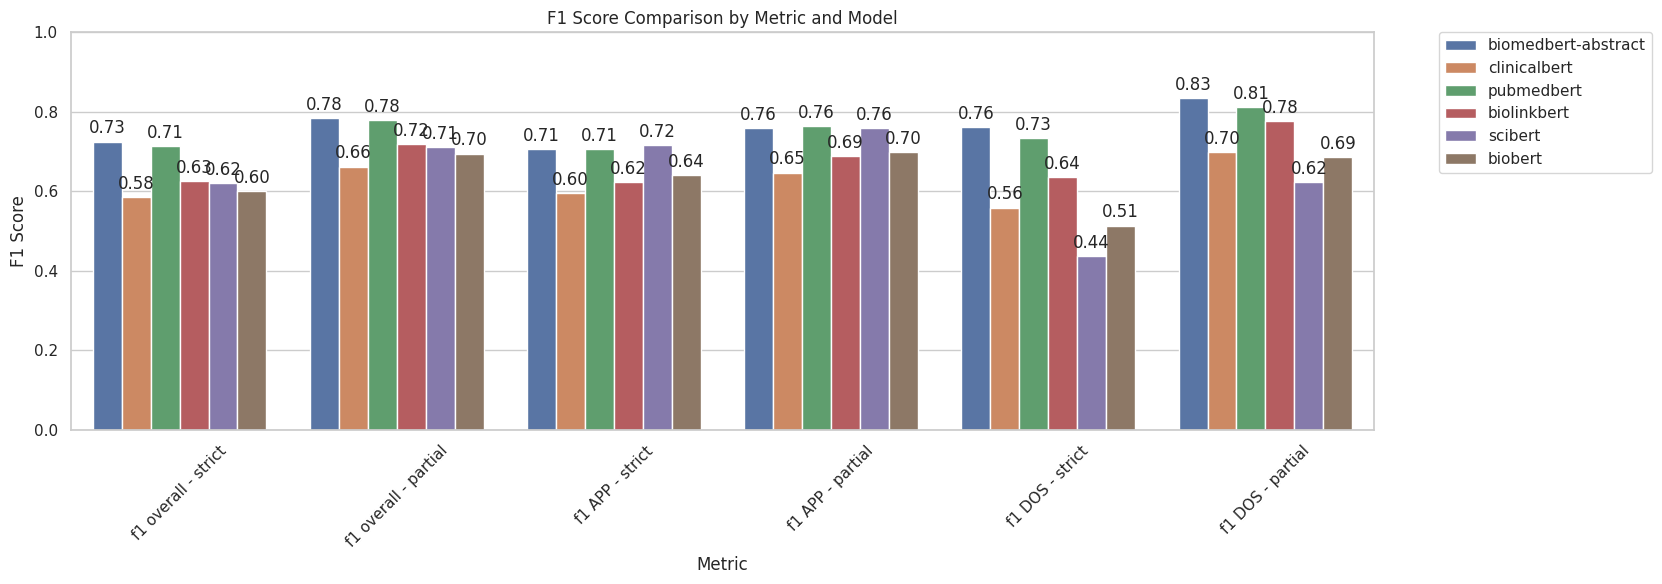

In [23]:
# plot results for all models, one plot per metric using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(model_r).T.reset_index().rename(columns={"index": "Model"})
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Set the plotting style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")

# Annotate each bar with the score
for container in barplot.containers:
    barplot.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

# Adjust the plot
plt.ylim(0, 1)
plt.title("F1 Score Comparison by Metric and Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
# add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

